In [126]:
# Marketing Analytics - Retail and E-Commerce - RFM Analysis used to understand customer 
# segmentation based on purchasing behaviour.
# RFM stands for Recency, Frequency and Monetary Value Analysis
# These metrics provide information about customer engagement, loyalty and value to 
# business

# Recency (date when customers made last purchase)
# Frequency (how often customers made purchase)
# Monetary Value (total amount spent on purchases)

# RFM analysis scores are given in range of 1 to 5
# Recency [5,4,3,2,1] - Higher Score for Lower Recency
# Frequency [1,2,3,4,5] - Higher Score for Higher Frequency
# Monetary Value [1,2,3,4,5] - Higher Score for Higher Monetary Value

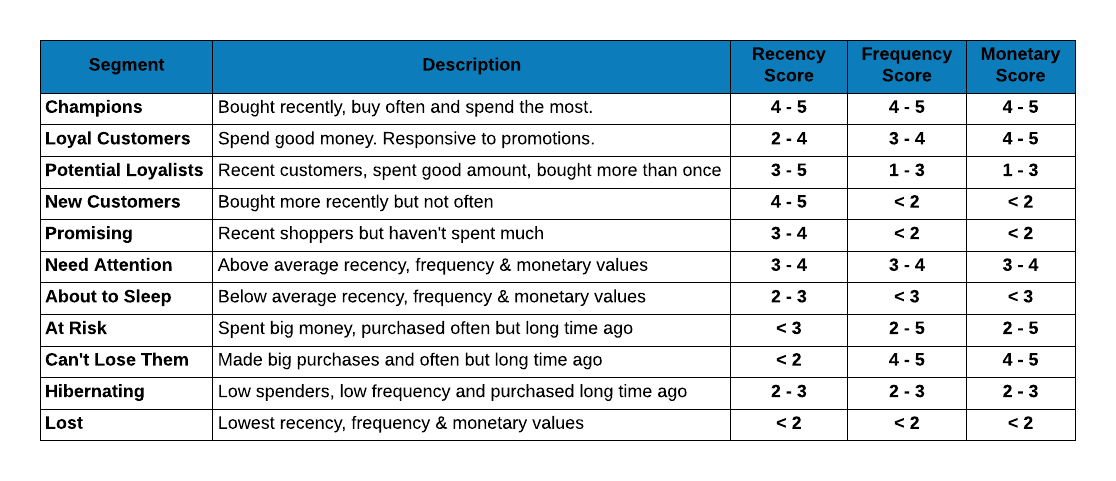

In [127]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [128]:
# Importing the data set
rfmdf=pd.read_csv(r"C:\Users\srava\github projects\RFM Analysis\rfm_data.csv")

In [129]:
rfmdf.info() # Infomation about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [130]:
# From info we get to know that there are no null values present in the data,
# and the information about no of rows,columns,dtypes etc...

In [131]:
rfmdf.head(5) # Gives the first five rows of the data set

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [132]:
# Convert Purchase date to datetime format
rfmdf.PurchaseDate=pd.to_datetime(rfmdf.PurchaseDate)

In [133]:
rfmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


In [134]:
print(rfmdf['PurchaseDate'].min(), rfmdf['PurchaseDate'].max())

2023-04-11 00:00:00 2023-06-10 00:00:00


In [135]:
# starting date is 2023-04-11 and end date is 2023-06-10

In [136]:
# Calculate Recency
from datetime import datetime

rfmdf['Recency']=(datetime.now().date()-rfmdf.PurchaseDate.dt.date)/np.timedelta64(1,'D')

In [137]:
rfmdf.Recency.head() # in days

0    267.0
1    267.0
2    267.0
3    267.0
4    267.0
Name: Recency, dtype: float64

In [138]:
rfmdf.Recency.min() # minimum days

207.0

In [139]:
rfmdf.Recency.max() # maximum days

267.0

In [140]:
# Calculate Frequency (how frequent customer making purchase )
freq_df=rfmdf.groupby('CustomerID')['OrderID'].count().reset_index()

In [141]:
freq_df.head(5) # gives the no of orders made by customer according to customerID

,CustomerID,OrderID
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1


In [142]:
# Renaming orderID as Frequency 
freq_df.rename(columns={'OrderID':'Frequency'},inplace=True) 

In [143]:
freq_df.head(5) # column names is changed

,CustomerID,Frequency
0,1011,2
1,1025,1
2,1029,1
3,1046,1
4,1049,1


In [144]:
# Merging freq_df to rfmdf 
rfmdf=rfmdf.merge(freq_df,on='CustomerID',how="left")

In [145]:
rfmdf.head(4) # Frequency column is added

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,267.0,1
1,2188,2023-04-11,463.70,Product A,176819,London,267.0,1
2,4608,2023-04-11,80.28,Product A,340062,New York,267.0,1
3,2559,2023-04-11,221.29,Product A,239145,London,267.0,1


In [146]:
# Calculate Monetary Value(total amount spent by customer)
monetary=rfmdf.groupby('CustomerID')['TransactionAmount'].sum().reset_index()

In [147]:
monetary.head(5)

,CustomerID,TransactionAmount
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72


In [148]:
# Renaming TransactionAmount as MonetaryValue
monetary.rename(columns={'TransactionAmount':'MonetaryValue'},inplace=True)

In [149]:
monetary.head(5)

,CustomerID,MonetaryValue
0,1011,1129.02
1,1025,359.29
2,1029,704.99
3,1046,859.82
4,1049,225.72


In [150]:
# Merging monetary with rfmdf
rfmdf=rfmdf.merge(monetary,on="CustomerID",how="left")

In [151]:
rfmdf.head(5) # MonetaryValue column has been added

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,267.0,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,267.0,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,267.0,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,267.0,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,267.0,1,739.56


In [152]:
# Define Scales for RFM Score or Value
recency_scale=[5,4,3,2,1]
frequency_scale=[1,2,3,4,5]
monetary_scale=[1,2,3,4,5]

In [153]:
# Calculating Recency Scores
rfmdf['RecencyScore']=pd.cut(rfmdf.Recency,bins=5,labels=recency_scale)

In [154]:
rfmdf.RecencyScore.value_counts(dropna=False)

RecencyScore
2    238
5    201
4    189
1    188
3    184
Name: count, dtype: int64

In [155]:
# Calculating Frequency Scores
rfmdf['FrequencyScore']=pd.cut(rfmdf.Frequency,bins=5,labels=frequency_scale)

In [156]:
rfmdf.FrequencyScore.value_counts(dropna=False)

FrequencyScore
1    895
3     96
5      9
2      0
4      0
Name: count, dtype: int64

In [157]:
# Calculating Monetary Scores
rfmdf['MonetaryScore']=pd.cut(rfmdf.MonetaryValue,bins=5,labels=monetary_scale)

In [158]:
rfmdf.MonetaryScore.value_counts(dropna=False)

MonetaryScore
2    467
1    427
3     84
4     16
5      6
Name: count, dtype: int64

In [159]:
rfmdf.info() # scores are in category we need to change them into int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   float64       
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   category      
 10  FrequencyScore      1000 non-null   category      
 11  MonetaryScore       1000 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 74.0+ KB


In [160]:
# Chaging the data type as int 
rfmdf.RecencyScore=rfmdf.RecencyScore.astype(int)
rfmdf.FrequencyScore=rfmdf.FrequencyScore.astype(int)
rfmdf.MonetaryScore=rfmdf.MonetaryScore.astype(int)

In [161]:
rfmdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   float64       
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   int32         
 10  FrequencyScore      1000 non-null   int32         
 11  MonetaryScore       1000 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(3), object(2)
memory usage: 82.2+ KB


In [162]:
# Calculating RFM Score based on Recency Score,Frequency Score,Monetary Score
rfmdf["RFM_Score"]=rfmdf.RecencyScore+rfmdf.FrequencyScore+rfmdf.MonetaryScore

In [163]:
rfmdf.RFM_Score.value_counts(dropna=False)

RFM_Score
7     196
6     190
5     180
4     173
8     117
3      82
9      28
11     15
10     12
12      4
13      2
15      1
Name: count, dtype: int64

In [164]:
# Making them into segments based on RFM scores
rfm_segments=[]
for row in rfmdf.RFM_Score:
    if row>=9:
        rfm_segments.append("Champions")
    elif row>=6:
        rfm_segments.append("Loyalists")
    elif row>=5:
        rfm_segments.append("At Risk")
    elif row>=4:
        rfm_segments.append("Can't Lose")
    else:
        rfm_segments.append("Lost")
rfmdf["RFM_Segment"]=rfm_segments

In [165]:
rfmdf.RFM_Segment.value_counts(dropna=False)

RFM_Segment
Loyalists     503
At Risk       180
Can't Lose    173
Lost           82
Champions      62
Name: count, dtype: int64

In [166]:
loyals=rfmdf[rfmdf.RFM_Segment=="Loyalists"]

In [167]:
loyals[['Recency',"Frequency","MonetaryValue"]].describe()

,Recency,Frequency,MonetaryValue
count,503.000000,503.000000,503.000000
mean,226.351889,1.097416,588.520596
std,13.237240,0.296818,307.554612
min,207.000000,1.000000,21.240000
25%,217.000000,1.000000,327.010000
50%,224.000000,1.000000,626.810000
75%,235.000000,1.000000,828.110000
max,267.000000,2.000000,1820.530000


<Axes: >

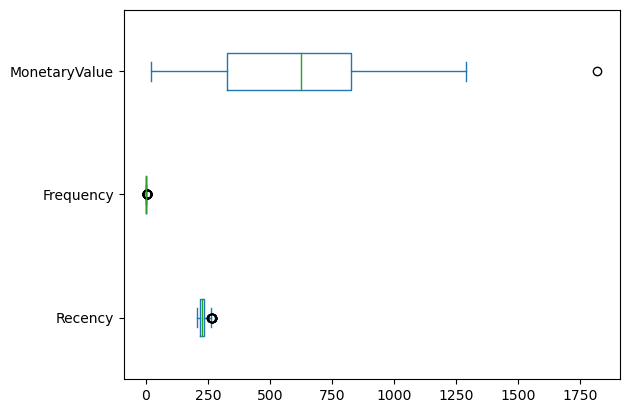

In [168]:
loyals[['Recency',"Frequency","MonetaryValue"]].plot(kind="box",vert=False)

In [169]:
# Top 20 Loyalists 
pd.crosstab(rfmdf['CustomerID'],rfmdf.RFM_Segment).nlargest(20,columns="Loyalists")

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
CustomerID,,,,,
1519,0,0,0,0,2
1601,0,0,0,0,2
1920,0,0,0,0,2
2702,0,0,0,0,2
4401,0,0,0,0,2
4695,0,0,0,0,2
5583,0,0,0,0,2
6617,0,0,0,0,2
8216,0,0,0,0,2


In [170]:
# Top 20 Champions
pd.crosstab(rfmdf['CustomerID'],rfmdf.RFM_Segment).nlargest(20,columns="Champions")

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
CustomerID,,,,,
4804,0,0,3,0,0
5557,0,0,3,0,0
7363,0,0,3,0,0
1305,0,0,2,0,0
1480,0,0,2,0,0
2133,0,0,2,0,0
2526,0,0,2,0,0
3262,0,0,2,0,0
3695,0,0,2,0,0


In [171]:
# No of Top 20 loyalists from each location
pd.crosstab(rfmdf.Location,rfmdf.RFM_Segment).nlargest(20,columns="Loyalists")

RFM_Segment,At Risk,Can't Lose,Champions,Lost,Loyalists
Location,,,,,
Tokyo,46,48,22,25,137
New York,47,32,15,19,134
London,38,52,16,18,122
Paris,49,41,9,20,110
